In [1]:
from benchmark_speech import Benchmark

from transcribe_functions import pydub_to_np, transcribe_audio

from transformers import Wav2Vec2ForSequenceClassification, Wav2Vec2FeatureExtractor

from pydub import AudioSegment

from IPython.display import display

import pandas as pd
import numpy as np

from explainers.explanation_speech import ExplanationSpeech

from helpers.model_helper_fsc import ModelHelperFSC

c:\Users\Роман\AppData\Local\Programs\Python\Python310\lib\site-packages\pkg_resources\__init__.py:2167: PkgResourcesDeprecationWarning:         ********************************************************************************
        `encoding="utf-8"` fails with 'c:\\users\\роман\\appdata\\local\\programs\\python\\python310\\lib\\site-packages\\deepspeech-pytorch.egg-link', trying `encoding='locale'`.

        This fallback behaviour is considered **deprecated** and future versions of
        `setuptools/pkg_resources` may not implement it.

        Please encode 'c:\\users\\роман\\appdata\\local\\programs\\python\\python310\\lib\\site-packages\\deepspeech-pytorch.egg-link' with "utf-8" to ensure future builds will succeed.

        If this file was produced by `setuptools` itself, cleaning up the cached files
        and re-building/re-installing the package with a newer version of `setuptools`
        (e.g. by updating `build-system.requires` in its `pyproject.toml`)
        might s

In [2]:
model = Wav2Vec2ForSequenceClassification.from_pretrained(
    "superb/wav2vec2-base-superb-ic"
)
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(
    "superb/wav2vec2-base-superb-ic"
)

benchmark = Benchmark(model, feature_extractor, device="cpu")

In [3]:
AUDIO_PATH = "./2d7bb170-45e1-11e9-81ce-69b74fd7e64e.wav"
word_transcript = None

## Transcript

In [4]:
transcript_whisperx = transcribe_audio(audio_path=AUDIO_PATH, language="en")
transcript_whisperx

Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.2.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\Роман\.cache\torch\whisperx-vad-segmentation.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.0.1+cu117. Bad things might happen unless you revert torch to 1.x.


(' Play the music.',
 [{'word': 'Play', 'start': 0.536, 'end': 0.739, 'score': 0.738},
  {'word': 'the', 'start': 0.78, 'end': 0.861, 'score': 0.832},
  {'word': 'music.', 'start': 0.901, 'end': 1.185, 'score': 0.869}])

## Explanation with "Leave-One-Out"

In [5]:
explanation = benchmark.explain(
    audio_path=AUDIO_PATH, 
    methodology='LOO', words_trascript=word_transcript)

Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.2.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\Роман\.cache\torch\whisperx-vad-segmentation.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.0.1+cu117. Bad things might happen unless you revert torch to 1.x.


In [6]:
display(benchmark.show_table(explanation, decimals=3))

,Play,the,music.
action=activate,0.178,0.080,0.519
object=music,-0.000,-0.000,0.859
location=none_location,0.000,0.000,0.002


## Show variation

In [7]:
perturbation_types = ['time stretching', 'pitch shifting']
variations_table = benchmark.explain_variations(
        audio_path=AUDIO_PATH,
        perturbation_types=perturbation_types)

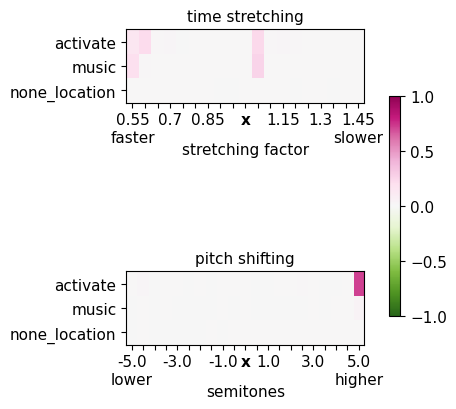

In [8]:
variations_table_plot = {k:variations_table[k] for k in variations_table if k in ['time stretching', 'pitch shifting', 'noise']}
fig = benchmark.plot_variations(variations_table_plot, show_diff = True, figsize=(4.6, 4.2))
fig.savefig(f'variation_LOO_FSC.pdf', bbox_inches='tight')